In [34]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [35]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

In [36]:
X=X[{"proline","alcohol","total_phenols"}]

In [37]:
X

,proline,alcohol,total_phenols
0,1065.0,14.23,2.80
1,1050.0,13.20,2.65
2,1185.0,13.16,2.80
3,1480.0,14.37,3.85
4,735.0,13.24,2.80
...,...,...,...
173,740.0,13.71,1.68
174,750.0,13.40,1.80
175,835.0,13.27,1.59
176,840.0,13.17,1.65


In [38]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [39]:
df = X.join(pd.Series(y, name='class'))

In [40]:
class_feature_means = pd.DataFrame(columns=wine.target_names)
for c, rows in df.groupby('class'):
    class_feature_means[c] = rows.mean()
class_feature_means

,class_0,class_1,class_2
proline,1115.711864,519.507042,629.895833
alcohol,13.744746,12.278732,13.153750
total_phenols,2.840169,2.258873,1.678750


In [42]:
within_class_scatter_matrix = np.zeros((3,3))
for c, rows in df.groupby('class'):
    rows = rows.drop(['class'], axis=1)
    
    s = np.zeros((3,3))
    for index, row in rows.iterrows():
        x, mc = row.values.reshape(3,1), class_feature_means[c].values.reshape(3,1)
        s += (x - mc).dot((x - mc).T)
    within_class_scatter_matrix += s

In [43]:
feature_means = df.mean()
between_class_scatter_matrix = np.zeros((3,3))
for c in class_feature_means:    
    n = len(df.loc[df['class'] == c].index)
    
    mc, m = class_feature_means[c].values.reshape(3,1), feature_means.values.reshape(3,1)
    
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)

In [44]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

In [45]:
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])

3.5104968338697575
0.8095929657965425
1.1882855810441129e-16


In [46]:
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

Explained Variance
Eigenvector 0: 0.8125981163958494
Eigenvector 1: 0.18740188360415067
Eigenvector 2: 2.7506038905392675e-17


In [47]:
w_matrix = np.hstack((pairs[0][1].reshape(3,1), pairs[1][1].reshape(3,1))).real

In [48]:
w_matrix

array([[ 3.7624e-03,  1.2942e-04],
       [ 8.3988e-01, -5.3436e-01],
       [ 5.4276e-01,  8.4526e-01]])

In [49]:
X_lda = np.array(X.dot(w_matrix))

In [50]:
le = LabelEncoder()
y = le.fit_transform(df['class'])

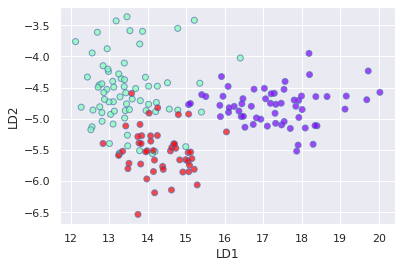

In [51]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)